**Import the requierd python libraries and Dataset**

In [458]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
np.random.seed(0)

In [459]:
#To displays all columns and rows uncomment below
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [460]:
df = pd.read_csv('datasetFull_2.csv')
df.head()  #shows the first five rows
#df

,Time,Source,Destination,Protocol,Length,TotalLength,SourcePort,DestinationPort,DestinationMacAddress,SourceMacAddress,PacketClassification
0,0.000000,192.168.1.93,52.111.242.6,TLSv1.2,83,69,49354,443,78:65:59:a4:64:39,c4:b3:01:d8:fb:ff,normal
1,0.011431,52.111.242.6,192.168.1.93,TLSv1.2,79,65,443,49354,c4:b3:01:d8:fb:ff,78:65:59:a4:64:39,normal
2,0.011537,192.168.1.93,52.111.242.6,TCP,54,40,49354,443,78:65:59:a4:64:39,c4:b3:01:d8:fb:ff,normal
3,12.227874,192.168.1.93,151.101.62.133,TCP,54,40,49253,443,78:65:59:a4:64:39,c4:b3:01:d8:fb:ff,normal
4,12.238331,151.101.62.133,192.168.1.93,TCP,66,52,443,49253,c4:b3:01:d8:fb:ff,78:65:59:a4:64:39,normal


**Exploratory Data Analysis(EDA)**

 Exploratory Data Analysis (EDA) is an approach to analyzing datasets to summarize their main characteristics, often with visual methods. EDA is used for seeing what the data can tell us before the modeling task.

In [461]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6569 entries, 0 to 6568
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Time                   6569 non-null   float64
 1   Source                 6569 non-null   object 
 2   Destination            6569 non-null   object 
 3   Protocol               6569 non-null   object 
 4   Length                 6569 non-null   int64  
 5   TotalLength            6569 non-null   int64  
 6   SourcePort             6569 non-null   int64  
 7   DestinationPort        6569 non-null   int64  
 8   DestinationMacAddress  6569 non-null   object 
 9   SourceMacAddress       6569 non-null   object 
 10  PacketClassification   6569 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 564.6+ KB


In [462]:
df.shape

(6569, 11)

In [463]:
#Description of dataset
df.describe()

,Time,Length,TotalLength,SourcePort,DestinationPort
count,6569.000000,6569.000000,6569.000000,6569.000000,6569.000000
mean,119.062792,237.026336,222.998021,33518.690364,24608.078094
std,57.358208,445.186000,445.197451,29362.736769,28390.503285
min,0.000000,54.000000,40.000000,80.000000,80.000000
25%,75.281392,54.000000,40.000000,443.000000,80.000000
50%,80.810659,66.000000,52.000000,49457.000000,443.000000
75%,192.577095,66.000000,52.000000,63221.000000,49472.000000
max,206.740153,1506.000000,1492.000000,63549.000000,63549.000000


**Checking Missing value**

We will now check for missing values in our dataset.We will use the isnull(), that tells us how many missing values we have in each column in our dataset. The output (Pandas Series) should look like this:

In [464]:
#checking for the null values
df.isnull().sum()/len(df)

Time                     0.0
Source                   0.0
Destination              0.0
Protocol                 0.0
Length                   0.0
TotalLength              0.0
SourcePort               0.0
DestinationPort          0.0
DestinationMacAddress    0.0
SourceMacAddress         0.0
PacketClassification     0.0
dtype: float64

# **Plots**

## **1.   Plot of how many ddos request per second vs normal traffic per second(Time column)**

Text(0.5, 1.0, 'DDos request per second')

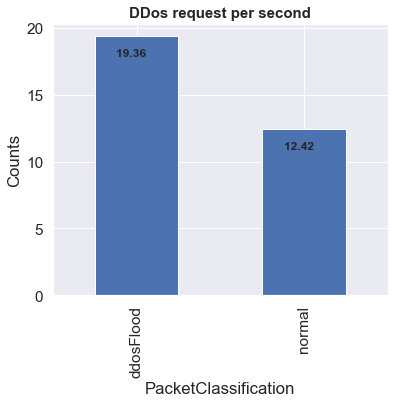

In [465]:
#Plots the number of reqests made by ddos and nromal traffic per second
temp = np.round((df.groupby('PacketClassification').size()/df.iloc[-1,0]),2)      # Getting the ddos request per second (Formula: # ddos/Total Time) and for normal request per second (# Normal/Total Time)
ax = temp.plot(kind='bar', stacked=True, figsize=[6, 5]) 
for index, data in enumerate(temp):
    ax.text(index-0.12, data-1.5, str(data), fontsize = 12, fontweight='bold')    # For putting text in the plot. str(data) converts numerical data to string
ax.set_ylabel('Counts')
ax.set_title('DDos request per second', fontsize=15, fontweight='bold')

## **2. Plot bar chart of ip address for source**

Text(0.5, 1.0, 'Counts of IP Address of Source')

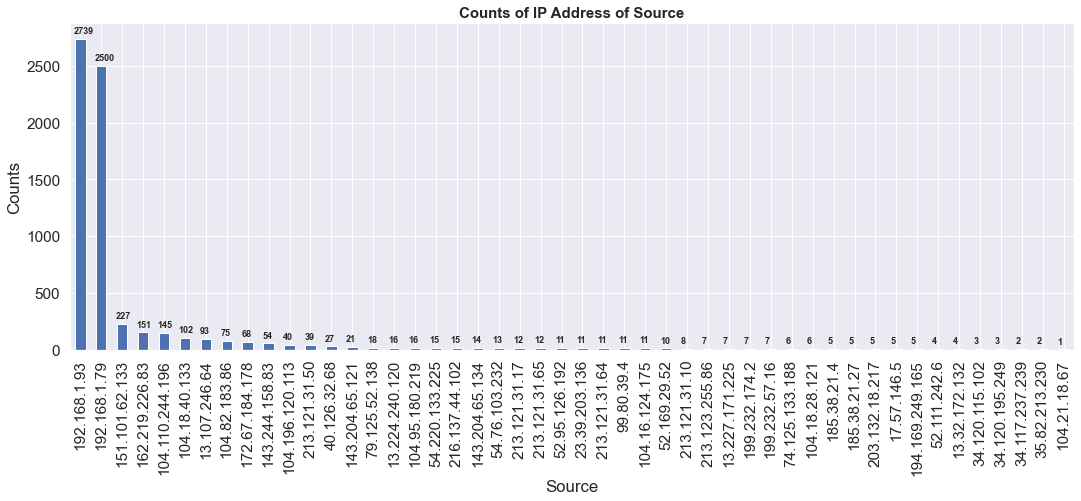

In [466]:
#get the count of how many times an IP-address appears in the source column
temp = df.groupby('Source').size().sort_values(ascending=False)   # Getting the counts of Source IP and sorting into descending order
ax = temp.plot(kind='bar', stacked=True, figsize=[18, 6]) 
for index, data in enumerate(temp):
    ax.text(index-0.30, data+50, str(data), fontsize = 9, fontweight='bold')    # For text in the plot
ax.set_ylabel('Counts')
ax.set_title('Counts of IP Address of Source', fontsize=15, fontweight='bold')

## **3. Plot bar chart of ip address for destination**

Text(0.5, 1.0, 'Counts of IP Address of Destination')

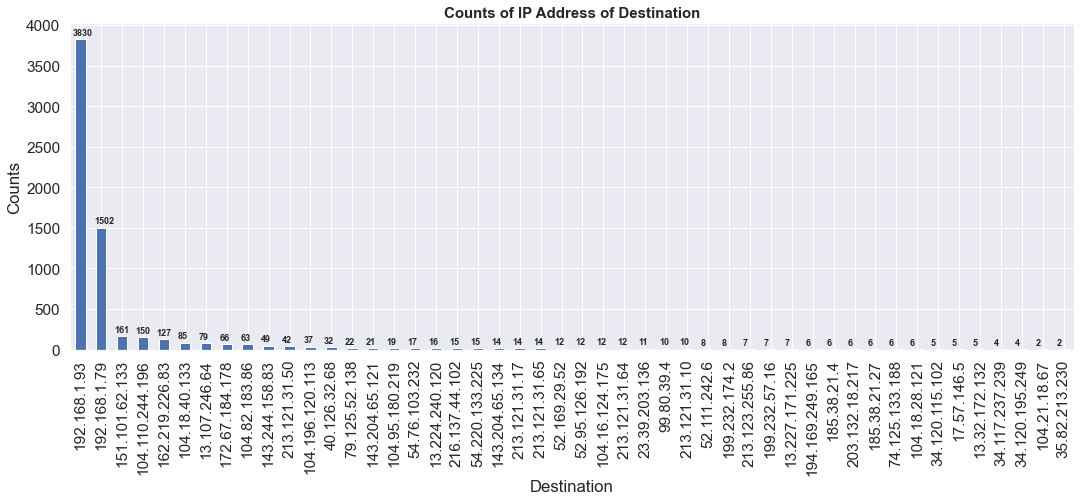

In [467]:
temp = df.groupby('Destination').size().sort_values(ascending=False)   # Getting the counts of destination IP and sorting in descending order
ax = temp.plot(kind='bar', stacked=True, figsize=[18, 6]) 
for index, data in enumerate(temp):
    ax.text(index-0.35, data+50, str(data), fontsize = 9, fontweight='bold')    # For text in the plot
ax.set_ylabel('Counts')
ax.set_title('Counts of IP Address of Destination', fontsize=15, fontweight='bold')

## **4. Plot of protocol used by ddos vs normal**

In [468]:
#Protocol breakdown based on AttackTyoe/PacketClassification
pd.crosstab(df["Protocol"],df["PacketClassification"])

PacketClassification,ddosFlood,normal
Protocol,,
TCP,4002,1800
TLSv1.2,0,250
TLSv1.3,0,517


Text(0.5, 1.0, 'Protocols used by Normal vs DDos')

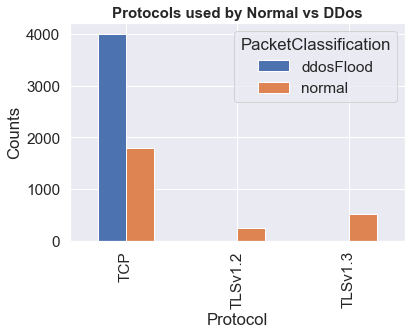

In [469]:
# Generating the dataframe with Protocol counts Packet classification wise.
pd.crosstab(df["Protocol"].astype(str),df["PacketClassification"]).plot.bar()
plt.ylabel('Counts')
plt.title('Protocols used by Normal vs DDos', fontsize=15, fontweight='bold')

## **5. Plot of source and destination ports used by ddos attack**

In [470]:
#create new df Source which counts unique Source port numbers used by ddos request
Source = df[df['PacketClassification'] == 'ddosFlood'].groupby('SourcePort').size().sort_values(ascending=False).to_frame().T
#print(Source)
Source['Others'] = Source.iloc[:, 1:].sum(axis=1)  #sums the value in all columns after 1st column(i.e., port80)
Source['Others']
s = Source[[80,'Others']]
print(s)

SourcePort    80  Others
0           1502    2500


In [471]:
#create new df Dest which counts unique destination port numbers used by ddos request
Dest = df[df['PacketClassification'] == 'ddosFlood'].groupby('DestinationPort').size().sort_values(ascending=False).to_frame().T
Dest['Others'] = Dest.iloc[:, 1:].sum(axis=1)   #sums the value in all columns after 1st column(i.e., port80)
d  = Dest[[80,'Others']]
print(d)

DestinationPort    80  Others
0                2500    1502


In [472]:
#merge the results from s and d into one table/dataframe
merged = s.append(d)
merged['Tag'] = ['Source','Destination']   #create row headers/titles
merged = merged.set_index('Tag')
merged

,80,Others
Tag,,
Source,1502,2500
Destination,2500,1502


Text(0.5, 1.0, 'Source and Destination ports used by ddos attack')

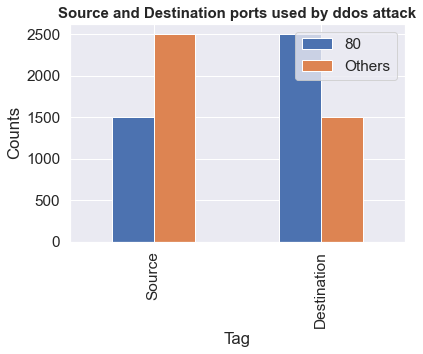

In [473]:
#Plot
merged.plot.bar()
plt.ylabel('Counts')
plt.title('Source and Destination ports used by ddos attack', fontsize=15, fontweight='bold')

# **Some Utility Functions**

In [474]:
def preprocessing(df):
    '''
    Function for preprocessing of the data
    Takes dataframe as input
    Does following preprocessing,
    1) drops time column
    2) Does One hot encoding of Categorical columns
    3) Does Label encoding of Target Variable
    4) Standardize the data
    
    Return final dataframe 
    '''
    df = df.drop(columns=['Time'])

    for col in ['Source', 'Destination', 'Protocol', 'DestinationMacAddress', 'SourceMacAddress']:
        # Get dummies of the column and right merge into the original dataframe
        df = pd.merge(left=df,
                    right=pd.get_dummies(df[col], prefix=col, prefix_sep='_'),
                    left_index=True,
                    right_index=True
        )
        df = df.drop(columns = [col])
    
    # Replacing Normal with 0 and ddosFlood with 1
    df = df.replace({'PacketClassification':{'normal':0,'ddosFlood':1}})

    # Scaling only specific columns
    col = ['Length', 'TotalLength',	'SourcePort', 'DestinationPort']
    scaler = StandardScaler()
    X = scaler.fit_transform(df[col])
    df[col] = X

    return df


def plot_confusion_matrix(conf_mat):        
    '''
    Function for Plotting the confusion matrix
    Takes raw confusion matrix as input
    '''
    classes = ["Normal","DdosFlood"]        # Our Two classes 
    df_cm = pd.DataFrame(conf_mat,classes,classes)  # Make dataframe of the confusion matrix
    data = df_cm.values.astype(str)         # Converting values to string
    plt.figure(figsize=(5,4))
    sns.set(font_scale=1.4)                 # Setting fontsize
    sns.heatmap(df_cm, annot=data, fmt = '', annot_kws={"size": 16})    # Generating heatmap
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def report(x,y):   
    '''
    Function for priniting the classification report
    Takes actual: x and predicted label: y as input
    computes accuracy, classification report, confusion matrix, true positive rate, and false positive rate
    '''                        
    acc = accuracy_score(x,y)
    cr = classification_report(x,y,zero_division=0)

    # TP: True Positive,    TN: True Negative
    # FP: False Positive,   FN: False Negative  
    TP = TN = FP = FN = 0
    for i in range(len(x)):
        if x[i] == 1 and y[i] == 1: # If true label is 1 and predicted label is also 1
            TP += 1
        elif x[i] == 0 and y[i] == 0:   # If true label is 0 and predicted label is also 0
            TN += 1
        elif x[i] == 0 and y[i] == 1:   # If true label is 0 and predicted label is also 1
            FP += 1
        else:                           # If true label is 1 and predicted label is also 0
            FN += 1

    true_positive_rate = TP/(TP+FN)     # Computes true positive rate
    false_positive_rate = FP/(FP+TN)    # Computes false positive rate
    print("Accuracy: ", acc)
    print(f'\nTrue Positive Rate: {round(true_positive_rate,2)}')
    print(f'False Positive Rate: {round(false_positive_rate,2)}')
    print("\nClassification Report:\n", cr)
    
    cm = confusion_matrix(x,y,labels=[0, 1])
    plot_confusion_matrix(cm)


def message(clf,data):
    '''
    Function for printing the message when DDos attack is detected
    '''
    # Loop through all data
    for i in range(len(data)): 
        #   Predict data                                                 
        pred = clf.predict(data.iloc[i].values.reshape(1,-1))                  
        # If DDos detected
        if pred == 1:
            # Get all columns whose names start with Source_                                                           
            filter_col = [col for col in data if col.startswith('Source_')]     
            
            # Get column name which has 1 as data
            h = data[filter_col].iloc[i].isin([1]) 

            # Find the ip address and remove Source_ from that                             
            ip = str(h[h].index.values[0]).replace('Source_','')   

            # Display message             
            print(f'DDOs attack detected!\t\tSample Number: {i}\tSource IP: {ip}')      

In [475]:
df = preprocessing(df)      # Preprocessing data

In [476]:
df.head()

,Length,TotalLength,SourcePort,DestinationPort,PacketClassification,Source_104.110.244.196,Source_104.16.124.175,Source_104.18.28.121,Source_104.18.40.133,Source_104.196.120.113,...,Destination_99.80.39.4,Protocol_TCP,Protocol_TLSv1.2,Protocol_TLSv1.3,DestinationMacAddress_78:65:59:a4:64:39,DestinationMacAddress_b4:2e:99:d0:fa:1a,DestinationMacAddress_c4:b3:01:d8:fb:ff,SourceMacAddress_78:65:59:a4:64:39,SourceMacAddress_b4:2e:99:d0:fa:1a,SourceMacAddress_c4:b3:01:d8:fb:ff
0,-0.346008,-0.345936,0.539341,-0.851232,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.354994,-0.354921,-1.126537,0.871693,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
2,-0.411155,-0.411080,0.539341,-0.851232,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,-0.411155,-0.411080,0.535901,-0.851232,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
4,-0.384198,-0.384124,-1.126537,0.868135,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0


In [477]:
df.shape        # Shape after preprocessing

(6569, 110)

In [478]:
x = df.drop(columns=['PacketClassification'])       # Features
y = df['PacketClassification'].values               # Labels

In [479]:
#Test Train split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=42)  # Train-Test Split

print((X_train.shape, y_train.shape))
print((X_test.shape, y_test.shape))

((5255, 109), (5255,))
((1314, 109), (1314,))


**k-Nearest Neighbors ML model (kNN)**

In [480]:
model = KNeighborsClassifier()    # Classifier

# Hyperparameters to Tune
parameter_space = {
    'n_neighbors': np.arange(1,21)
}

# Hyperparameter Tunning
clf = GridSearchCV(model, parameter_space, cv = 5, scoring = "accuracy", verbose = True) # model
clf.fit(X_train.values,y_train)
print(f'Best Parameters: {clf.best_params_}')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_neighbors': 1}


In [481]:
#call message function to print if ddos is detected
message(clf,X_test)

DDOs attack detected!		Sample Number: 0	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 1	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 2	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 3	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 4	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 5	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 7	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 8	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 10	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 11	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 12	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 13	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 14	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 15	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 16	Source IP: 192.168.1.79
DDOs attack detected!		Sample Num

DDOs attack detected!		Sample Number: 211	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 212	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 213	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 214	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 216	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 217	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 218	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 219	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 220	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 222	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 223	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 225	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 226	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 228	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 229	Source IP: 192.168.1.79
DDOs attac

DDOs attack detected!		Sample Number: 432	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 434	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 438	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 439	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 440	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 442	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 443	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 445	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 446	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 449	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 450	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 451	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 453	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 457	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 458	Source IP: 192.168.1.79
DDOs attac

DDOs attack detected!		Sample Number: 657	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 658	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 659	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 660	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 661	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 663	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 664	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 665	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 667	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 668	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 670	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 672	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 673	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 676	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 682	Source IP: 192.168.1.93
DDOs attac

DDOs attack detected!		Sample Number: 894	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 895	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 896	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 897	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 898	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 899	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 900	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 901	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 902	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 904	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 906	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 907	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 908	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 910	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 912	Source IP: 192.168.1.79
DDOs attac

DDOs attack detected!		Sample Number: 1125	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 1126	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 1127	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 1128	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 1131	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 1132	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 1133	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 1134	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 1135	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 1137	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 1139	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 1140	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 1141	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 1142	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 1143	Source IP: 192.168.

In [482]:
#Make predictions useing the trained datasets
train_pred = clf.predict(X_train.values)   # Train predict
test_pred = clf.predict(X_test.values)     # Test predict

		Train output:

Accuracy:  1.0

True Positive Rate: 1.0
False Positive Rate: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2075
           1       1.00      1.00      1.00      3180

    accuracy                           1.00      5255
   macro avg       1.00      1.00      1.00      5255
weighted avg       1.00      1.00      1.00      5255



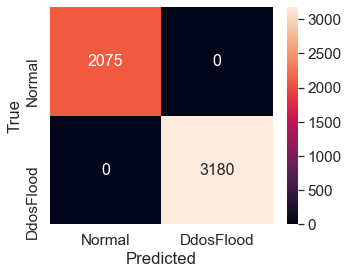

In [483]:
print("\t\tTrain output:\n")
report(y_train,train_pred)

		Test output:

Accuracy:  1.0

True Positive Rate: 1.0
False Positive Rate: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       492
           1       1.00      1.00      1.00       822

    accuracy                           1.00      1314
   macro avg       1.00      1.00      1.00      1314
weighted avg       1.00      1.00      1.00      1314



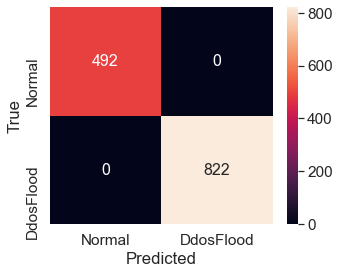

In [484]:
print("\t\tTest output:\n")
report(y_test,test_pred)

**Logistic Regression ML model (LR)**

In [485]:
#logistic regression model form the sklearn lib
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
clfLR = lr.fit(X_train, y_train)
clfLR.fit(X_train.values,y_train)

LogisticRegression()

In [486]:
#call message function to print if ddos is detected
message(clfLR,X_test)

DDOs attack detected!		Sample Number: 0	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 1	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 2	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 3	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 4	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 5	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 7	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 8	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 10	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 11	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 12	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 13	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 14	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 15	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 16	Source IP: 192.168.1.79
DDOs attack detected!		Sample Num

DDOs attack detected!		Sample Number: 366	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 369	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 370	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 371	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 372	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 374	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 375	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 378	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 379	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 381	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 382	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 383	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 384	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 385	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 386	Source IP: 192.168.1.79
DDOs attac

DDOs attack detected!		Sample Number: 751	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 752	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 753	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 755	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 758	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 762	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 764	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 765	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 766	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 768	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 769	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 770	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 771	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 772	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 778	Source IP: 192.168.1.93
DDOs attac

DDOs attack detected!		Sample Number: 1143	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 1146	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 1147	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 1148	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 1149	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 1150	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 1151	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 1152	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 1153	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 1154	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 1155	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 1157	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 1159	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 1162	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 1163	Source IP: 192.168.

In [487]:
#Make predictions useing the trained datasets
train_pred_lr = clfLR.predict(X_train.values)   # Train predict
test_pred_lr = clfLR.predict(X_test.values)     # Test predict

		Train output for Linear regression model:

Accuracy:  1.0

True Positive Rate: 1.0
False Positive Rate: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2075
           1       1.00      1.00      1.00      3180

    accuracy                           1.00      5255
   macro avg       1.00      1.00      1.00      5255
weighted avg       1.00      1.00      1.00      5255



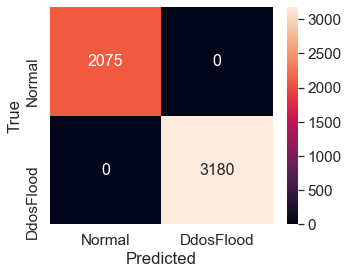

In [488]:
print("\t\tTrain output for Linear regression model:\n")
report(y_train,train_pred_lr)

		Train output for Linear regression model:

Accuracy:  1.0

True Positive Rate: 1.0
False Positive Rate: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       492
           1       1.00      1.00      1.00       822

    accuracy                           1.00      1314
   macro avg       1.00      1.00      1.00      1314
weighted avg       1.00      1.00      1.00      1314



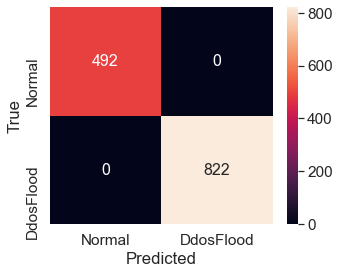

In [489]:
print("\t\tTrain output for Linear regression model:\n")
report(y_test,test_pred_lr)

**Random Forest Classifier (RFC)**

In [490]:
#import the RFC from the Sklearn 
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
clfRFC = rfc.fit(X_train, y_train)
clfRFC.fit(X_train.values,y_train)

RandomForestClassifier()

In [491]:
#call message function to print if ddos is detected
message(clfRFC,X_test)

DDOs attack detected!		Sample Number: 0	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 1	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 2	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 3	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 4	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 5	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 7	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 8	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 10	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 11	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 12	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 13	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 14	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 15	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 16	Source IP: 192.168.1.79
DDOs attack detected!		Sample Num

DDOs attack detected!		Sample Number: 207	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 209	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 210	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 211	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 212	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 213	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 214	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 216	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 217	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 218	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 219	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 220	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 222	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 223	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 225	Source IP: 192.168.1.79
DDOs attac

DDOs attack detected!		Sample Number: 393	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 394	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 395	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 396	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 397	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 399	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 400	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 401	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 405	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 409	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 411	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 412	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 414	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 415	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 418	Source IP: 192.168.1.93
DDOs attac

DDOs attack detected!		Sample Number: 626	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 627	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 628	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 630	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 631	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 632	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 633	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 634	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 636	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 637	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 638	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 639	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 640	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 641	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 642	Source IP: 192.168.1.79
DDOs attac

DDOs attack detected!		Sample Number: 827	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 829	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 830	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 831	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 833	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 834	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 836	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 837	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 838	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 839	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 843	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 847	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 850	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 851	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 854	Source IP: 192.168.1.79
DDOs attac

DDOs attack detected!		Sample Number: 1020	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 1026	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 1027	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 1028	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 1029	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 1034	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 1035	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 1037	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 1040	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 1042	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 1045	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 1048	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 1051	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 1052	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 1053	Source IP: 192.168.

DDOs attack detected!		Sample Number: 1237	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 1238	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 1239	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 1240	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 1242	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 1243	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 1244	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 1245	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 1246	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 1247	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 1248	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 1249	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 1250	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 1251	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 1252	Source IP: 192.168.

In [492]:
#Make predictions useing the trained datasets
train_pred_rfc = clfRFC.predict(X_train.values)   # Train predict
test_pred_rfc = clfRFC.predict(X_test.values)     # Test predict

		Train output for Random Forest Classifier model:

Accuracy:  1.0

True Positive Rate: 1.0
False Positive Rate: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2075
           1       1.00      1.00      1.00      3180

    accuracy                           1.00      5255
   macro avg       1.00      1.00      1.00      5255
weighted avg       1.00      1.00      1.00      5255



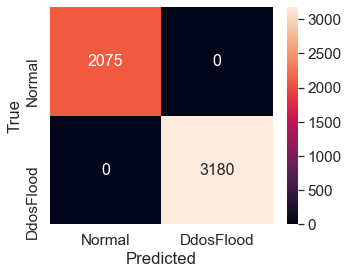

In [493]:
print("\t\tTrain output for Random Forest Classifier model:\n")
report(y_train,train_pred_rfc)

		Train output for Random Forest Classifier model:

Accuracy:  1.0

True Positive Rate: 1.0
False Positive Rate: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       492
           1       1.00      1.00      1.00       822

    accuracy                           1.00      1314
   macro avg       1.00      1.00      1.00      1314
weighted avg       1.00      1.00      1.00      1314



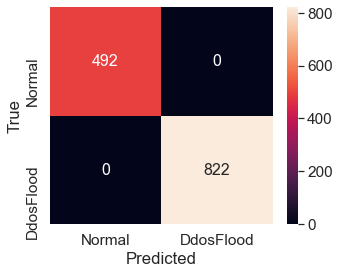

In [494]:
print("\t\tTrain output for Random Forest Classifier model:\n")
report(y_test,test_pred_rfc)

**Accuracy Ploting**

In [495]:
#Accuracies of the algorithm we implement above
accuracies=[['kNN',100],['LR',100],['RFC',100]]
scores=pd.DataFrame(accuracies,columns=['model','accuracy'])  #Stores the accuracy score of each model to a df called score

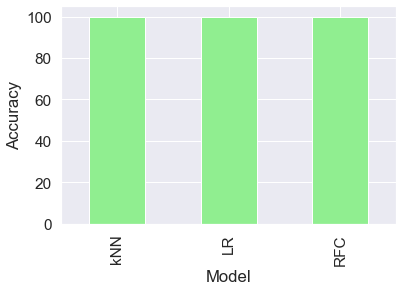

In [496]:
#accuracy ploted
scores.set_index('model').accuracy.plot(kind='bar',color='lightGreen')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()